<a href="https://colab.research.google.com/github/kkorhone/Python_Notebooks/blob/main/pygex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pygfunction

     |████████████████████████████████| 81kB 6.9MB/s 


In [4]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import pygfunction as gt

------------------------------------------------------------
Calculating g-function for uniform heat extraction rate
------------------------------------------------------------
Identifying similarities ...
0.13105225563049316 sec
Calculating segment to segment response factors ...
1.972917079925537 sec
Building and solving system of equations ...
0.0009768009185791016 sec
Total time for g-function evaluation: 2.0277161598205566 sec
------------------------------------------------------------
------------------------------------------------------------
Calculating g-function for uniform heat extraction rate
------------------------------------------------------------
Identifying similarities ...
0.12670063972473145 sec
Calculating segment to segment response factors ...
5.257098913192749 sec
Building and solving system of equations ...
0.0015757083892822266 sec
Total time for g-function evaluation: 5.3390350341796875 sec
------------------------------------------------------------
----

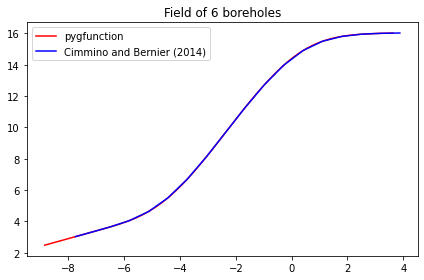

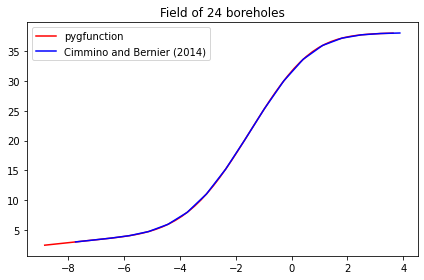

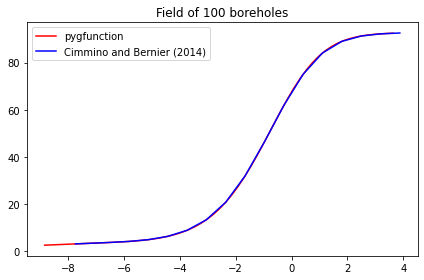

In [15]:
if __name__ == "__main__":

    # -------------------------------------------------------------------------
    # Simulation parameters
    # -------------------------------------------------------------------------

    # Borehole dimensions

    D = 4.0             # Borehole buried depth (m)
    H = 150.0           # Borehole length (m)
    r_b = 0.075         # Borehole radius (m)
    B = 7.5             # Borehole spacing (m)

    # Thermal properties

    alpha = 1.0e-6      # Ground thermal diffusivity (m2/s)

    # Path to validation data

    file_path = "/content/drive/My Drive/PygData/CiBe14_uniform_heat_extraction_rate.txt"

    # Geometrically expanding time vector

    dt = 100*3600.                  # Time step
    tmax = 3000. * 8760. * 3600.    # Maximum time
    Nt = 50                         # Number of time steps
    ts = H**2/(9.*alpha)            # Bore field characteristic time

    time = gt.utilities.time_geometric(dt, tmax, Nt)

    # -------------------------------------------------------------------------
    # Borehole fields
    # -------------------------------------------------------------------------

    # Field of 3x2 (n=6) boreholes

    N_1 = 3
    N_2 = 2

    bore_field1 = gt.boreholes.rectangle_field(N_1, N_2, B, B, H, D, r_b)

    # Field of 6x4 (n=24) boreholes

    N_1 = 6
    N_2 = 4

    bore_field2 = gt.boreholes.rectangle_field(N_1, N_2, B, B, H, D, r_b)

    # Field of 10x10 (n=100) boreholes

    N_1 = 10
    N_2 = 10

    bore_field3 = gt.boreholes.rectangle_field(N_1, N_2, B, B, H, D, r_b)

    # -------------------------------------------------------------------------
    # Load data from Cimmino and Bernier (2014)
    # -------------------------------------------------------------------------

    data = np.loadtxt(file_path, skiprows=55)

    # -------------------------------------------------------------------------
    # Evaluate g-functions for all fields
    # -------------------------------------------------------------------------

    i = 0

    for field in [bore_field1, bore_field2, bore_field3]:

        gfunc = gt.gfunction.uniform_heat_extraction(field, time, alpha, disp=True)

        # Draw g-function and reference g-function

        fig, ax = plt.subplots()
        ax.plot(np.log(time/ts), gfunc, "r-")
        ax.plot(data[:,0], data[:,i+1], "b-")
        ax.legend(["pygfunction", "Cimmino and Bernier (2014)"])
        ax.set_title("Field of {} boreholes".format(len(field)))
        plt.tight_layout()

        i += 1